<a href="https://colab.research.google.com/github/konradplonka/machine-learning-bootcamp/blob/main/01_basics/02_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import bibliotek

In [116]:
import numpy as np
import pandas as pd
import sklearn

# Wygenerowanie danych

In [117]:
data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender': ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


# Utworzenie kopii danych

In [118]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


# Sprawdzanie braków

In [119]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [120]:
df.isnull().sum()

,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [121]:
df.isnull().sum().sum()

5

In [122]:
df.isnull().sum() / len(df)

,0
size,0.166667
color,0.000000
gender,0.166667
price,0.166667
weight,0.333333
bought,0.000000


In [123]:
df['weight']

,weight
0,500.0
1,450.0
2,300.0
3,NaN
4,410.0
5,NaN


# Uzupełnianie braków SimpleImputer

In [124]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df['weight'] = imputer.fit_transform(df[['weight']])

df



,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [125]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0)
imputer.fit_transform(df[['price']])



array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [126]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['size'] = imputer.fit_transform(df[['size']])[:,0]
df



,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,M,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [127]:
df = df_raw.copy()
df


,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [128]:
df.isnull().sum()


,0
size,1
color,0
gender,1
price,1
weight,2
bought,0


In [129]:
df['weight'].isnull()

,weight
0,False
1,False
2,False
3,True
4,False
5,True


In [130]:
df[df['weight'].isnull()]

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [131]:
df[~df['weight'].isnull()]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [132]:
df['weight'].notnull()

,weight
0,True
1,True
2,True
3,False
4,True
5,False


In [133]:
df[df['weight'].notnull()]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [134]:
df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,brak,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,brak,no


In [135]:
df.fillna(value=0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,green,female,129.0,0.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,0.0,no


In [136]:
df['size']

,size
0,XL
1,L
2,M
3,NaN
4,M
5,M


In [137]:
df['size'] = df['size'].fillna(value='L')
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [138]:
df = df.dropna()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


# Braki w szeregach czasowych

In [139]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


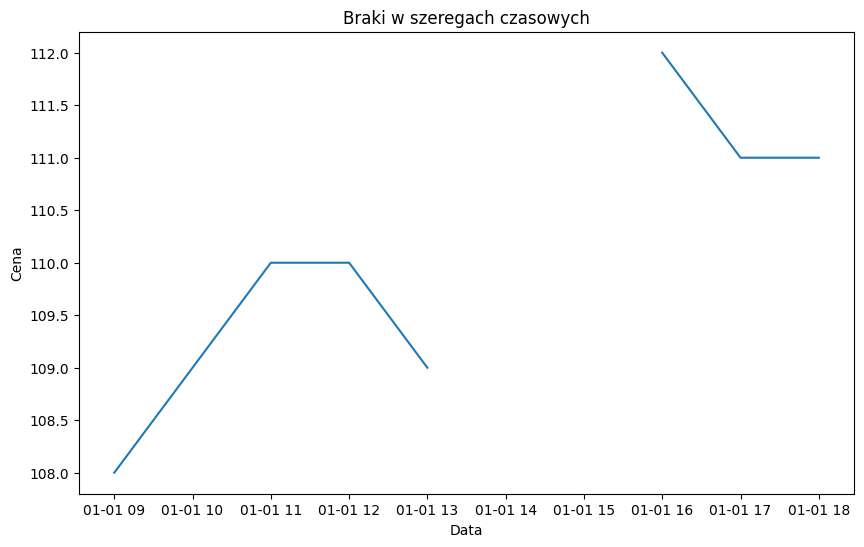

In [140]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df['price'])
ax.set_title('Braki w szeregach czasowych')
ax.set_xlabel('Data')
ax.set_ylabel('Cena')
plt.show()


In [141]:
import plotly.express as px

fig = px.line(df, x=df.index, y='price', title='Braki w szeregach czasowych', width=600, height=400)
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Cena')
fig.show()

### Usunięcie **braków**

In [142]:
df_plot = df.dropna()
fig = px.line(df_plot, x=df_plot.index, y='price', title='Braki w szeregach czasowych', width=600, height=400)
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Cena')
fig.show()

### Wypełnienie braków stałą wartością 0

In [143]:
df_plot = df.fillna(value=0)
fig = px.line(df_plot, x=df_plot.index, y='price', title='Braki w szeregach czasowych', width=600, height=400)
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Cena')
fig.show()

### Wypełnienie braków średnią

In [144]:
df_plot = df.fillna(value=df['price'].mean())

fig = px.line(df_plot, x=df_plot.index, y='price', title='Braki w szeregach czasowych', width=600, height=400)
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Cena')
fig.show()

### Wypełnienie braków poprzez zastosowanie interpolacji


In [145]:
df_plot = df.copy()
df_plot['price_interpolate'] = df_plot['price'].interpolate()

fig = px.line(df_plot, x=df_plot.index, y='price_interpolate', title='Braki w szeregach czasowych', width=600, height=400)
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Cena')
fig.show()


### Wypełnienie braków metodą forward fill

In [146]:
df_plot = df.copy()
df_plot['price'] = df_plot['price'].ffill()

fig = px.line(df_plot, x=df_plot.index, y='price', title='Braki w szeregach czasowych', width=600, height=400)
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Cena')
fig.show()
df_plot

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,109.0
2020-01-01 15:00:00,109.0
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


### Wypełnienie braków metodą backward fill

In [147]:
df_plot = df.copy()
df_plot['price'] = df_plot['price'].bfill()

fig = px.line(df_plot, x=df_plot.index, y='price', title='Braki w szeregach czasowych', width=600, height=400)
fig.update_xaxes(title_text='Data')
fig.update_yaxes(title_text='Cena')
fig.show()

df_plot

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,112.0
2020-01-01 15:00:00,112.0
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0
